<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-2/blob/main/PartC%5BObject_Detection_from_Image%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Yolov3.zip > /dev/null

In [231]:
from imutils.video import FileVideoStream
from imutils.video import FPS
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
import time
import cv2
from google.colab.patches import cv2_imshow

In [232]:
ynet = cv2.dnn.readNet('/content/Yolov3/yolov3.weights','/content/Yolov3/yolov3.cfg')

In [233]:
CLASSES=[]
fileptr = open('/content/Yolov3/coco.names', 'r')
Lines = fileptr.readlines()
for line in Lines:
  CLASSES.append(line[:-1])
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
print(len(CLASSES))
print(CLASSES)

80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


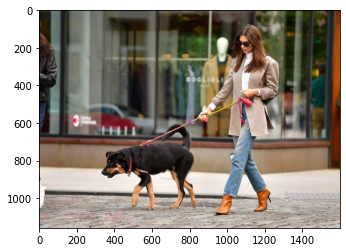

In [234]:
img=mpimg.imread('/content/sample.jpg')
(h,w)=img.shape[:2]
plt.imshow(img)

In [235]:
imr=cv2.resize(img, (416, 416))
blob=cv2.dnn.blobFromImage(imr,(1/255),(416,416),swapRB=True)

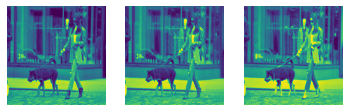

In [236]:
row=len(blob)
for bl in blob:
  col=len(bl)
  for i,blim in enumerate(bl):
    ax = plt.subplot(row,col, i + 1)
    plt.imshow(blim)
    plt.axis('off')

In [237]:
layer = ynet.getLayerNames()
out = [layer[i[0]-1] for i in ynet.getUnconnectedOutLayers()]

In [238]:
ynet.setInput(blob)
detection=ynet.forward(out)

In [239]:
class_id=[]
probability=[]
bound_box=[]
for ot in detection:
  for pred in ot:
    id = np.argmax(pred[5:])
    pb = pred[5:][id]
    if pb > 0.6:
      cx=int(pred[0]*w)
      cy=int(pred[1]*h)
      wd=int(pred[2]*w)
      ht=int(pred[3]*h)
      x=int(cx-wd/2)
      y=int(cy-ht/2)
      bound_box.append([x,y,wd,ht])
      probability.append(float(pb))
      class_id.append(id)

In [240]:
bound_box

[[852, 70, 424, 1047], [340, 707, 508, 325], [0, -23, 97, 1154]]

In [241]:
probability

[0.9999619722366333, 0.9728389382362366, 0.8165170550346375]

In [242]:
unique=cv2.dnn.NMSBoxes(bound_box,probability,0.3,0.6)

In [243]:
for i in range(len(bound_box)):
  if i in unique:
    x,y,wd,ht=[int(j) for j in bound_box[i]]
    label=str(CLASSES[class_id[i]])
    cv2.rectangle(img,(x,y),(x+wd,y+ht),COLORS[i],2)
    cv2.putText(img, label, (x, y+30),cv2.FONT_HERSHEY_SIMPLEX, 1, COLORS[i], 4)

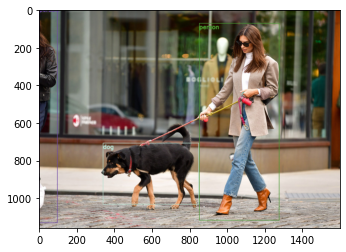

In [244]:
plt.imshow(img)